In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os
import math
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare
telco_df = acquire.get_telco_data()
telco_df = prepare.prep_telco(telco_df)
telco_df.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,churn,contract_type,internet_service_type,gender_Male,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,bel_avg_ten_abv_avg_mon_chrg,baseline
0,0002-ORFBO,0,1,1,9,1,No,No,Yes,No,...,0,One year,DSL,0,1,0,0,0,1,0
1,0003-MKNFE,0,0,0,9,1,Yes,No,No,No,...,0,Month-to-month,DSL,1,0,0,0,0,0,0
2,0004-TLHLJ,0,0,0,4,1,No,No,No,Yes,...,1,Month-to-month,Fiber optic,1,0,0,1,0,1,0
3,0011-IGKFF,1,1,0,13,1,No,No,Yes,Yes,...,1,Month-to-month,Fiber optic,1,0,0,1,0,1,0
4,0013-EXCHZ,1,1,0,3,1,No,No,No,No,...,1,Month-to-month,Fiber optic,0,0,0,1,0,1,0


In [2]:
train_telco, validate_telco, test_telco = prepare.split_data_telco(telco_df)
train_telco.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,churn,contract_type,internet_service_type,gender_Male,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,bel_avg_ten_abv_avg_mon_chrg,baseline
5894,3472-QPRCH,0,1,1,40,1,Yes,No internet service,No internet service,No internet service,...,0,Two year,None,1,0,1,0,1,0,0
2440,2676-ISHSF,0,0,0,1,1,No,No internet service,No internet service,No internet service,...,0,Month-to-month,None,1,0,0,0,1,0,0
5995,2157-MXBJS,0,1,0,13,1,Yes,No,No,Yes,...,1,One year,DSL,1,1,0,0,0,1,0
6048,3129-AAQOU,0,1,1,19,1,Yes,No internet service,No internet service,No internet service,...,0,Two year,None,0,0,1,0,1,0,0
785,1142-IHLOO,0,0,0,51,1,No,No,No,No,...,0,One year,Fiber optic,0,1,0,1,0,0,0


senior_citizen
0    3541
1     684
Name: senior_citizen, dtype: int64
0    83.810651
1    16.189349
Name: senior_citizen, dtype: float64


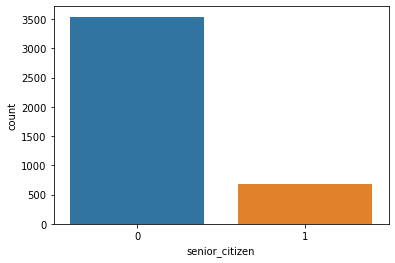

partner
0    2155
1    2070
Name: partner, dtype: int64
0    51.005917
1    48.994083
Name: partner, dtype: float64


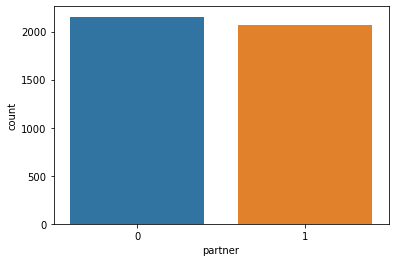

dependents
0    2934
1    1291
Name: dependents, dtype: int64
0    69.443787
1    30.556213
Name: dependents, dtype: float64


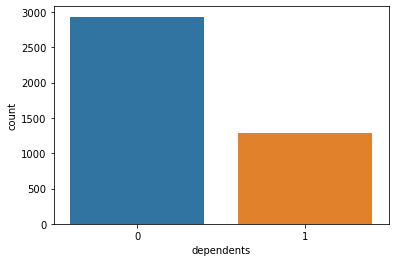

phone_service
1    3810
0     415
Name: phone_service, dtype: int64
1    90.177515
0     9.822485
Name: phone_service, dtype: float64


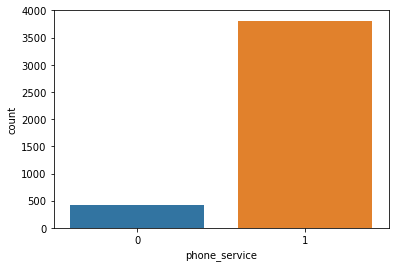

multiple_lines
No                  2064
Yes                 1746
No phone service     415
Name: multiple_lines, dtype: int64
No                  48.852071
Yes                 41.325444
No phone service     9.822485
Name: multiple_lines, dtype: float64


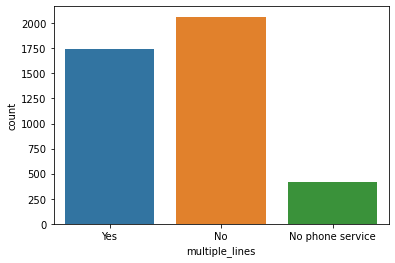

online_security
No                     2134
Yes                    1158
No internet service     933
Name: online_security, dtype: int64
No                     50.508876
Yes                    27.408284
No internet service    22.082840
Name: online_security, dtype: float64


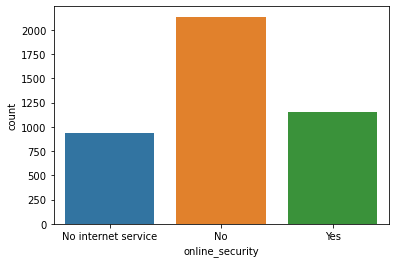

online_backup
No                     1868
Yes                    1424
No internet service     933
Name: online_backup, dtype: int64
No                     44.213018
Yes                    33.704142
No internet service    22.082840
Name: online_backup, dtype: float64


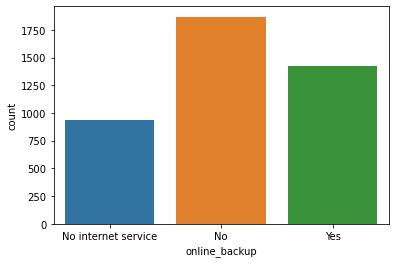

device_protection
No                     1840
Yes                    1452
No internet service     933
Name: device_protection, dtype: int64
No                     43.550296
Yes                    34.366864
No internet service    22.082840
Name: device_protection, dtype: float64


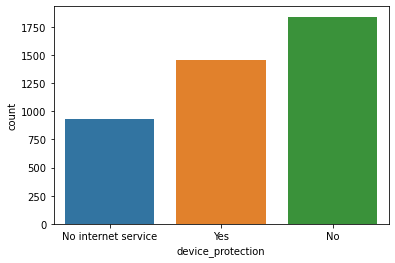

tech_support
No                     2082
Yes                    1210
No internet service     933
Name: tech_support, dtype: int64
No                     49.278107
Yes                    28.639053
No internet service    22.082840
Name: tech_support, dtype: float64


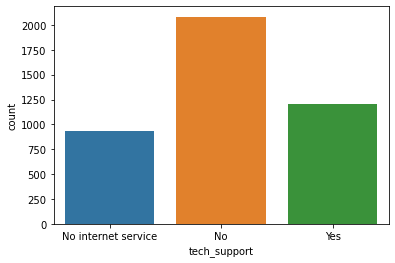

streaming_tv
No                     1676
Yes                    1616
No internet service     933
Name: streaming_tv, dtype: int64
No                     39.668639
Yes                    38.248521
No internet service    22.082840
Name: streaming_tv, dtype: float64


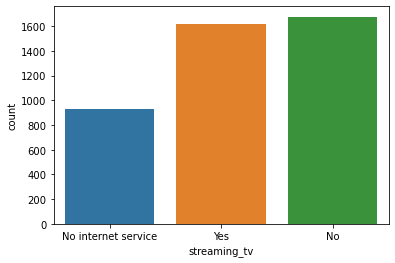

streaming_movies
No                     1657
Yes                    1635
No internet service     933
Name: streaming_movies, dtype: int64
No                     39.218935
Yes                    38.698225
No internet service    22.082840
Name: streaming_movies, dtype: float64


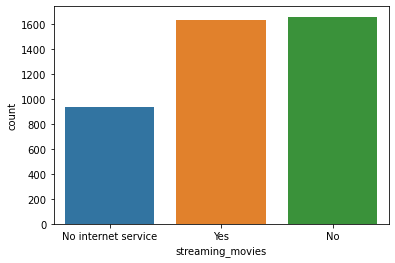

paperless_billing
1    2486
0    1739
Name: paperless_billing, dtype: int64
1    58.840237
0    41.159763
Name: paperless_billing, dtype: float64


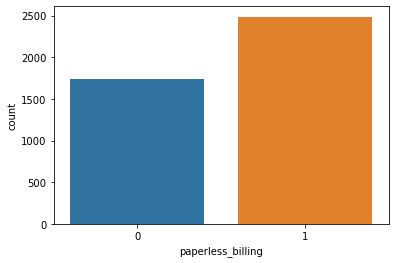

churn
0    3104
1    1121
Name: churn, dtype: int64
0    73.467456
1    26.532544
Name: churn, dtype: float64


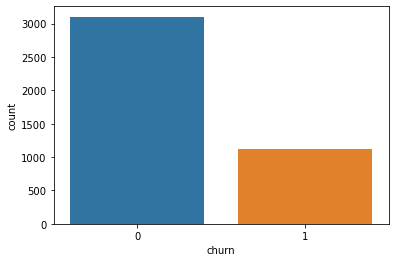

contract_type
Month-to-month    2330
Two year          1019
One year           876
Name: contract_type, dtype: int64
Month-to-month    55.147929
Two year          24.118343
One year          20.733728
Name: contract_type, dtype: float64


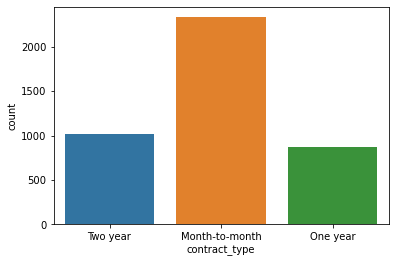

internet_service_type
Fiber optic    1831
DSL            1461
None            933
Name: internet_service_type, dtype: int64
Fiber optic    43.337278
DSL            34.579882
None           22.082840
Name: internet_service_type, dtype: float64


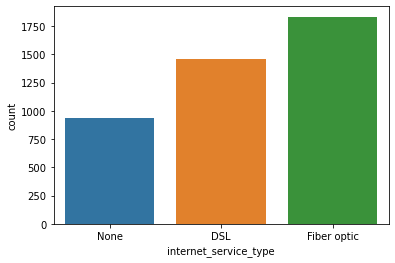

bel_avg_ten_abv_avg_mon_chrg
0    3103
1    1122
Name: bel_avg_ten_abv_avg_mon_chrg, dtype: int64
0    73.443787
1    26.556213
Name: bel_avg_ten_abv_avg_mon_chrg, dtype: float64


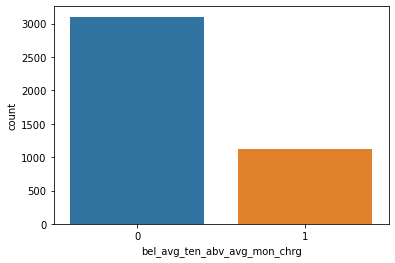

In [3]:
num_vars = ['tenure', 'monthly_charges', 'total_charges']
cat_vars = ['senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security',
            'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
           , 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'bel_avg_ten_abv_avg_mon_chrg']
for col in cat_vars:
    print(col)
    print(train_telco[col].value_counts())
    print(train_telco[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_telco)
    plt.show()

## Findings
- only 16 percent are senior citizens
- only 30 percent have dependents
- only 9 percent do not have phone service
- churn rate is about 27%
- majority of contracts are month to month (50%)

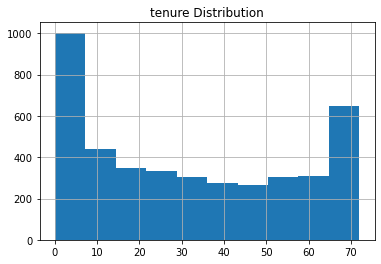

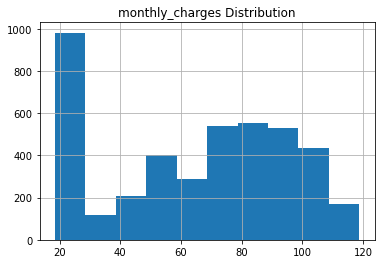

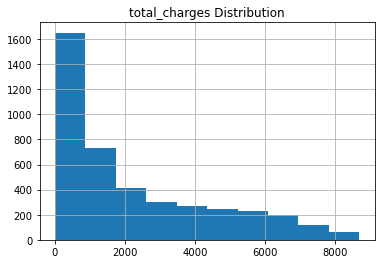

In [4]:
for col in num_vars:
    train_telco[col].hist()
    plt.title(col+' Distribution')
    plt.show()

In [5]:
def cat_vis(train_telco, col):
    plt.title('Relationship of churn and '+col)
    sns.barplot(x=col, y='churn', data=train_telco)
    churn_rate = train_telco.churn.mean()
    plt.axhline(churn_rate, label='churn rate')
    plt.legend()
    plt.show()
    
    
def cat_test(train_telco, col):
    alpha = 0.05
    null_hyp = col+' and churn are independent'
    alt_hyp = 'There is a relationship between churn and '+col
    observed = pd.crosstab(train_telco.churn, train_telco[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between churn and '+col)

def cat_analysis(train_telco, col):
    cat_vis(train_telco, col)
    cat_test(train_telco, col)

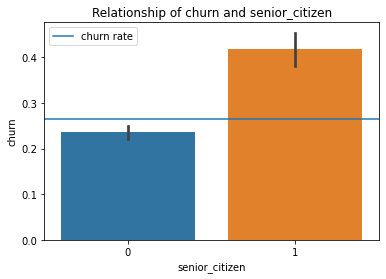

We reject the null hypothesis that senior_citizen and churn are independent
There is a relationship between churn and senior_citizen


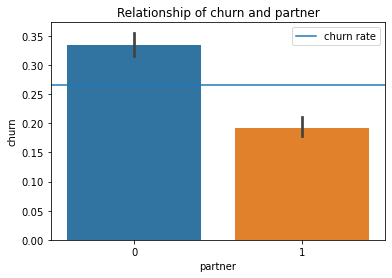

We reject the null hypothesis that partner and churn are independent
There is a relationship between churn and partner


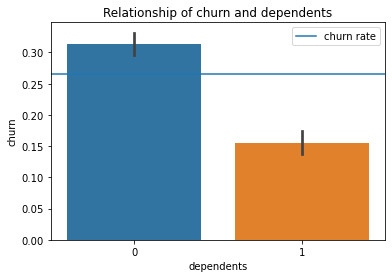

We reject the null hypothesis that dependents and churn are independent
There is a relationship between churn and dependents


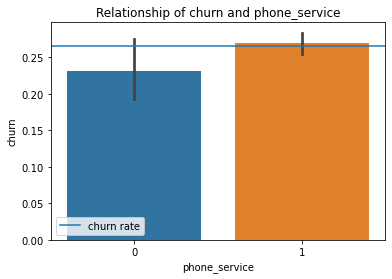

We fail to reject the null hypothesis that phone_service and churn are independent
There appears to be no relationship between churn and phone_service


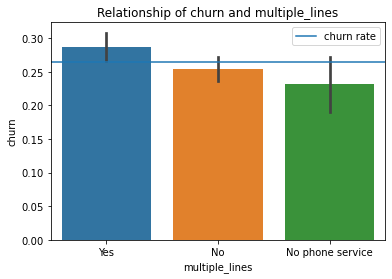

We reject the null hypothesis that multiple_lines and churn are independent
There is a relationship between churn and multiple_lines


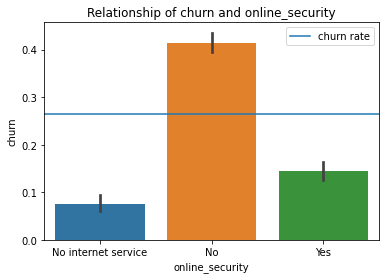

We reject the null hypothesis that online_security and churn are independent
There is a relationship between churn and online_security


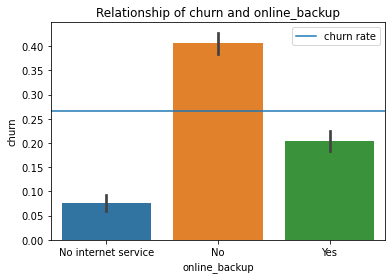

We reject the null hypothesis that online_backup and churn are independent
There is a relationship between churn and online_backup


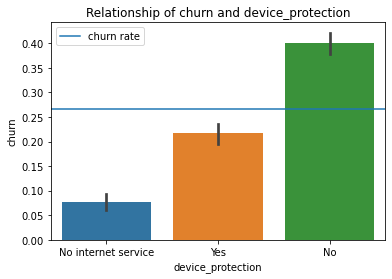

We reject the null hypothesis that device_protection and churn are independent
There is a relationship between churn and device_protection


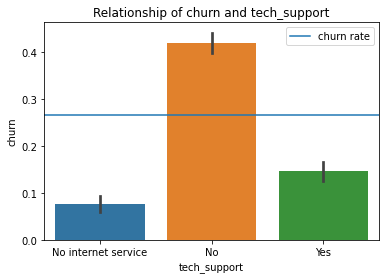

We reject the null hypothesis that tech_support and churn are independent
There is a relationship between churn and tech_support


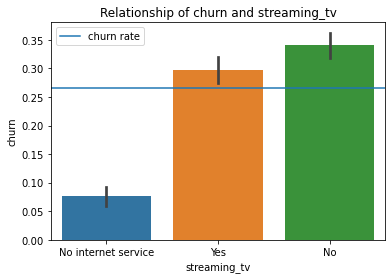

We reject the null hypothesis that streaming_tv and churn are independent
There is a relationship between churn and streaming_tv


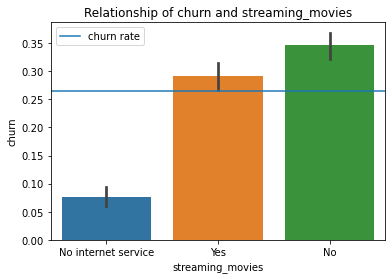

We reject the null hypothesis that streaming_movies and churn are independent
There is a relationship between churn and streaming_movies


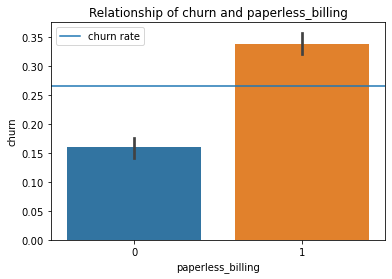

We reject the null hypothesis that paperless_billing and churn are independent
There is a relationship between churn and paperless_billing


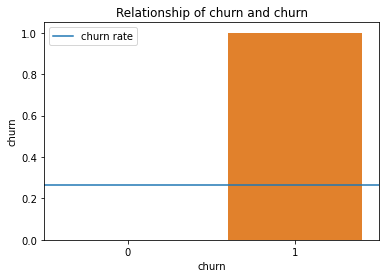

We reject the null hypothesis that churn and churn are independent
There is a relationship between churn and churn


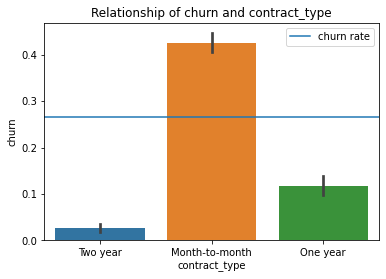

We reject the null hypothesis that contract_type and churn are independent
There is a relationship between churn and contract_type


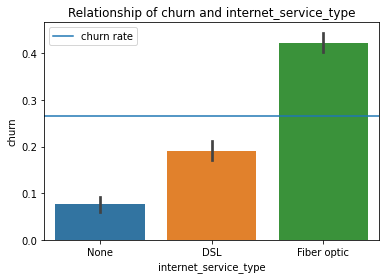

We reject the null hypothesis that internet_service_type and churn are independent
There is a relationship between churn and internet_service_type


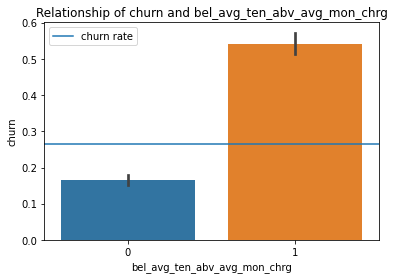

We reject the null hypothesis that bel_avg_ten_abv_avg_mon_chrg and churn are independent
There is a relationship between churn and bel_avg_ten_abv_avg_mon_chrg


In [6]:
for col in cat_vars:
    cat_analysis(train_telco, col)

## Findings
- There is a relationship between churn and senior_citizen
- There is a relationship between churn and partner
- There is a relationship between churn and dependents
- There appears to be no relationship between churn and phone_service
- There is a relationship between churn and multiple_lines
- There is a relationship between churn and online_security
- There is a relationship between churn and online_backup
- There is a relationship between churn and device_protection
- There is a relationship between churn and tech_support
- There is a relationship between churn and streaming_tv
- There is a relationship between churn and streaming_movies
- There is a relationship between churn and paperless_billing
- There is a relationship between churn and contract_type
- There is a relationship between churn and internet_service_type

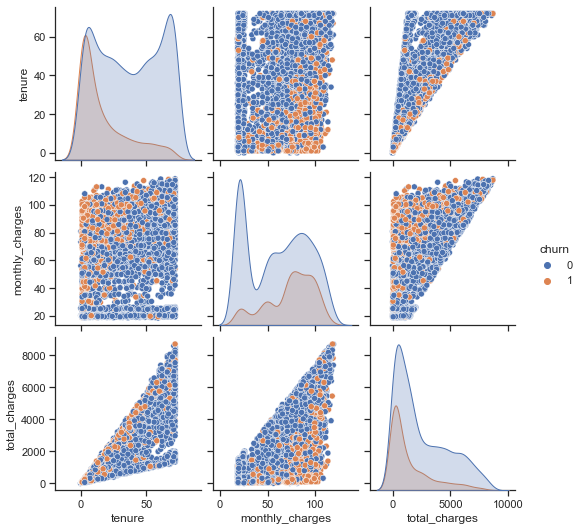

In [7]:
train_telco_scatter = train_telco[['tenure', 'monthly_charges', 'total_charges', 'churn']]
sns.set_theme(style="ticks")
sns.pairplot(train_telco_scatter, hue="churn")

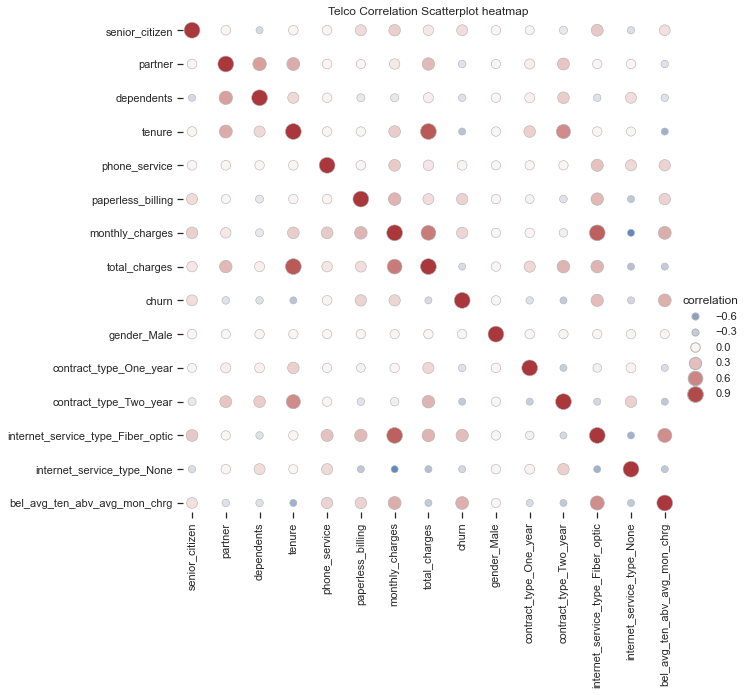

In [8]:
train_telco_corr = train_telco.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=train_telco_corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8))
g.set(xlabel="", ylabel="", title='Telco Correlation Scatterplot heatmap', aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

# Findings
- Tenure and total charges have a high correlation
- Tenure and two year contracts have a high correlation
- Monthly charges and fiber optic have a high correlation
- Churn has a positive correlation with monthly charges, papperless billing, fiber optic, gender, phone service, and senior citizen
- Churn as a high correlation with those who are above the average monthly charges and below the average tenure

We reject the null hypothesis that partner and churn are independent
There is a relationship between churn and partner


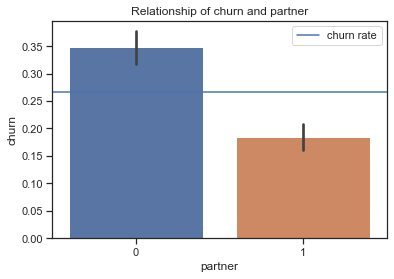

In [9]:
females = train_telco[train_telco.gender_Male == 0]
males = train_telco[train_telco.gender_Male == 1]
cat_test(females, 'partner')
cat_vis(females, 'partner')

We reject the null hypothesis that partner and churn are independent
There is a relationship between churn and partner


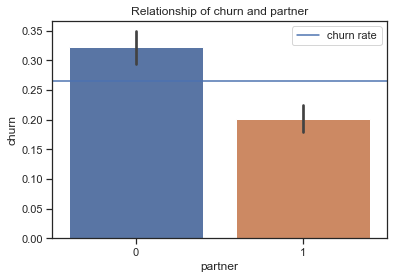

In [10]:
cat_test(males, 'partner')
cat_vis(males, 'partner')

- There is a higher churn rate for both males and females without partners.

We reject the null hypothesis that online_security and churn are independent
There is a relationship between churn and online_security


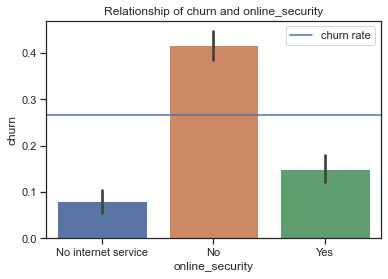

In [11]:
cat_test(females, 'online_security')
cat_vis(females, 'online_security')

We reject the null hypothesis that online_security and churn are independent
There is a relationship between churn and online_security


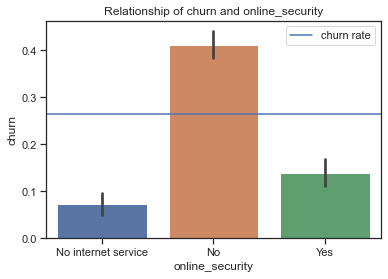

In [12]:
cat_test(males, 'online_security')
cat_vis(males, 'online_security')

- There is a higher churn rate for both males and females with no online security.

We reject the null hypothesis that paperless_billing and churn are independent
There is a relationship between churn and paperless_billing


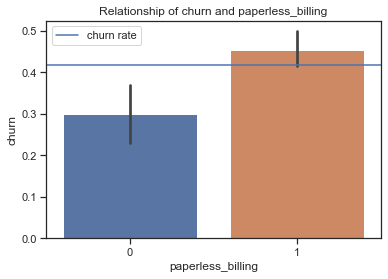

In [13]:
senior = train_telco[train_telco.senior_citizen == 1]
cat_test(senior, 'paperless_billing')
cat_vis(senior, 'paperless_billing')

We reject the null hypothesis that paperless_billing and churn are independent
There is a relationship between churn and paperless_billing


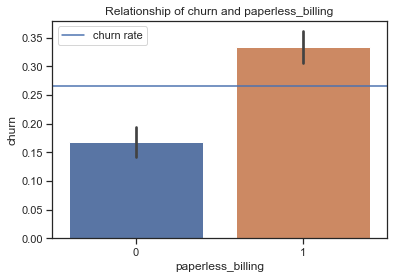

In [14]:
cat_test(females, 'paperless_billing')
cat_vis(females, 'paperless_billing')

- There is a higher churn rate for both seniors and females with papperless billing.

We reject the null hypothesis that phone_service and churn are independent
There is a relationship between churn and phone_service


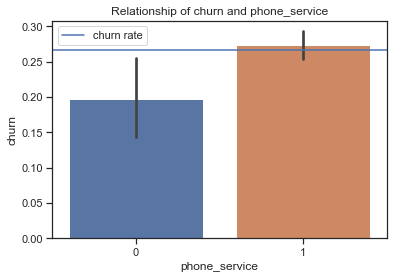

In [15]:
cat_test(females, 'phone_service')
cat_vis(females, 'phone_service')

We fail to reject the null hypothesis that phone_service and churn are independent
There appears to be no relationship between churn and phone_service


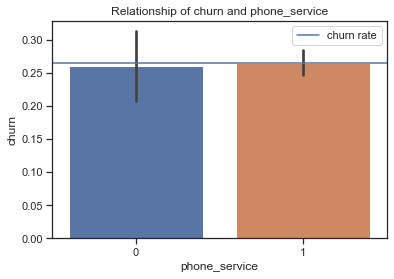

In [16]:
cat_test(males, 'phone_service')
cat_vis(males, 'phone_service')

- There is a higher churn rate for females with phone service, however this is not the case for males with phone service.

We reject the null hypothesis that tech_support and churn are independent
There is a relationship between churn and tech_support


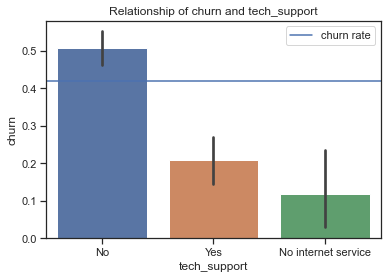

In [17]:
cat_test(senior, 'tech_support')
cat_vis(senior, 'tech_support')

- Churn rate for seniors without tech support is very high

## Visual might want to use


In [18]:
train_telco['gender_Male_str'] = train_telco.gender_Male.replace(0, 'Female')
train_telco.gender_Male_str = train_telco.gender_Male_str.replace(1, 'Male')

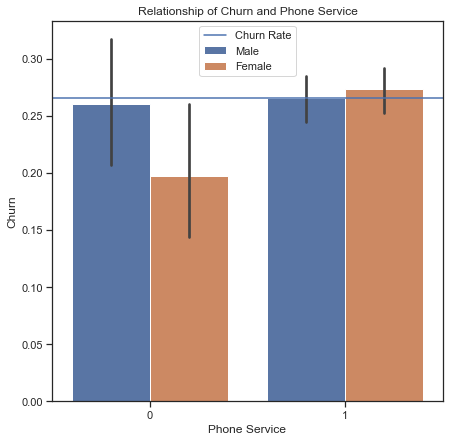

We fail to reject the null hypothesis that Phone Service and churn are independent
There appears to be no relationship between churn and Phone Service


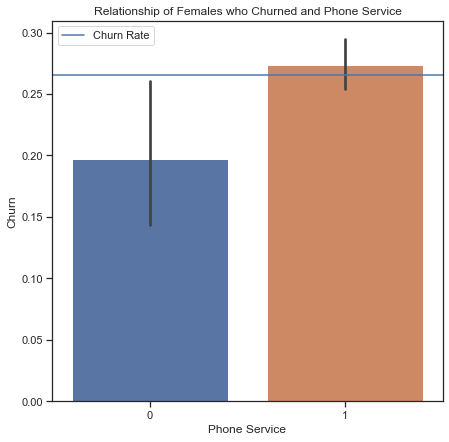

We reject the null hypothesis that Females who have Phone Service and churn are independent
There is a relationship between churn and Females with Phone Service


In [19]:
plt.figure(figsize = (7, 7))
plt.title('Relationship of Churn and Phone Service')

sns.barplot(x='phone_service', y='churn', hue='gender_Male_str', data=train_telco)

churn_rate = train_telco.churn.mean()

plt.axhline(churn_rate, label='Churn Rate')

plt.xlabel('Phone Service')
plt.ylabel('Churn')
plt.legend()
plt.show()
alpha = 0.05
null_hyp = 'Phone Service and churn are independent'
alt_hyp = 'There is a relationship between churn and Phone Service'
observed = pd.crosstab(train_telco.churn, train_telco.phone_service)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('We reject the null hypothesis that', null_hyp)
    print(alt_hyp)
else:
    print('We fail to reject the null hypothesis that', null_hyp)
    print('There appears to be no relationship between churn and Phone Service')
    
plt.figure(figsize = (7, 7))
plt.title('Relationship of Females who Churned and Phone Service')

sns.barplot(x='phone_service', y='churn', data=females)

plt.axhline(churn_rate, label='Churn Rate')

plt.xlabel('Phone Service')
plt.ylabel('Churn')
plt.legend()
plt.show()

null_hyp = 'Females who have Phone Service and churn are independent'
alt_hyp = 'There is a relationship between churn and Females with Phone Service'
observed = pd.crosstab(females.churn, females.phone_service)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('We reject the null hypothesis that', null_hyp)
    print(alt_hyp)
else:
    print('We fail to reject the null hypothesis that', null_hyp)
    print('There appears to be no relationship between churn and Females with Phone Service')

***

In [20]:
train_telco['churn_str'] = train_telco.churn.replace(0, 'No Churn')
train_telco.churn_str = train_telco.churn_str.replace(1, 'Churn')

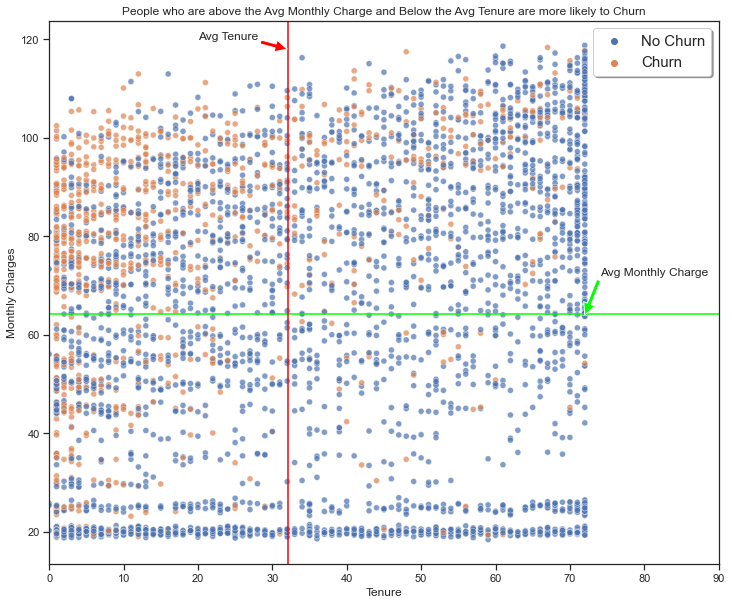

We reject the null hypothesis that People who are above the Avg Monthly Charge and Below the Avg Tenure are independent with churn
There is a relationship between churn and people who are above the Avg Monthly Charge and Below the Avg Tenure


In [21]:
avg_monthly_charges = train_telco.monthly_charges.mean()
avg_tenure = train_telco.tenure.mean()

plt.figure(figsize = (12, 10))

sns.scatterplot(data=train_telco, x='tenure', y='monthly_charges', hue='churn_str', alpha=.7)

plt.axhline(avg_monthly_charges, color='lime')
plt.axvline(avg_tenure, color='red')

plt.xlim(0, 90)
plt.annotate('Avg Monthly Charge', xy=(72,64), xytext=(74,72), arrowprops={'facecolor':'lime'})
plt.annotate('Avg Tenure', xy=(32,118), xytext=(20,120), arrowprops={'facecolor':'red'})
plt.legend(fancybox=True, shadow=True, prop={'size': 15})
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('People who are above the Avg Monthly Charge and Below the Avg Tenure are more likely to Churn')
plt.show()

null_hyp = 'People who are above the Avg Monthly Charge and Below the Avg Tenure are independent with churn'
alt_hyp = 'There is a relationship between churn and people who are above the Avg Monthly Charge and Below the Avg Tenure'
observed = pd.crosstab(train_telco.churn, train_telco.bel_avg_ten_abv_avg_mon_chrg)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('We reject the null hypothesis that', null_hyp)
    print(alt_hyp)
else:
    print('We fail to reject the null hypothesis that', null_hyp)
    print('There appears to be no relationship between churn and people who are above the Avg Monthly Charge and Below the Avg Tenure')

In [22]:
train_telco.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_type,gender_Male,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,bel_avg_ten_abv_avg_mon_chrg,baseline,gender_Male_str,churn_str
5894,3472-QPRCH,0,1,1,40,1,Yes,No internet service,No internet service,No internet service,...,None,1,0,1,0,1,0,0,Male,No Churn
2440,2676-ISHSF,0,0,0,1,1,No,No internet service,No internet service,No internet service,...,None,1,0,0,0,1,0,0,Male,No Churn
5995,2157-MXBJS,0,1,0,13,1,Yes,No,No,Yes,...,DSL,1,1,0,0,0,1,0,Male,Churn
6048,3129-AAQOU,0,1,1,19,1,Yes,No internet service,No internet service,No internet service,...,None,0,0,1,0,1,0,0,Female,No Churn
785,1142-IHLOO,0,0,0,51,1,No,No,No,No,...,Fiber optic,0,1,0,1,0,0,0,Female,No Churn


In [23]:
 train_telco.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'gender_Male',
       'contract_type_One_year', 'contract_type_Two_year',
       'internet_service_type_Fiber_optic', 'internet_service_type_None',
       'bel_avg_ten_abv_avg_mon_chrg', 'baseline', 'gender_Male_str',
       'churn_str'],
      dtype='object')

In [24]:
train_telco.dtypes

customer_id                           object
senior_citizen                         int64
partner                                int64
dependents                             int64
tenure                                 int64
phone_service                          int64
multiple_lines                        object
online_security                       object
online_backup                         object
device_protection                     object
tech_support                          object
streaming_tv                          object
streaming_movies                      object
paperless_billing                      int64
monthly_charges                      float64
total_charges                        float64
churn                                  int64
contract_type                         object
internet_service_type                 object
gender_Male                            uint8
contract_type_One_year                 uint8
contract_type_Two_year                 uint8
internet_s

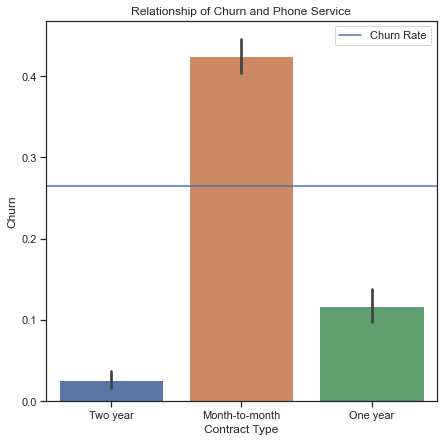

We reject the null hypothesis that Contract Type and churn are independent
There is a relationship between churn and Contract Type


In [25]:
plt.figure(figsize = (7, 7))
plt.title('Relationship of Churn and Phone Service')

sns.barplot(x='contract_type', y='churn', data=train_telco)

churn_rate = train_telco.churn.mean()

plt.axhline(churn_rate, label='Churn Rate')

plt.xlabel('Contract Type')
plt.ylabel('Churn')
plt.legend()
plt.show()

alpha = 0.05
null_hyp = 'Contract Type and churn are independent'
alt_hyp = 'There is a relationship between churn and Contract Type'
observed = pd.crosstab(train_telco.churn, train_telco.contract_type)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('We reject the null hypothesis that', null_hyp)
    print(alt_hyp)
else:
    print('We fail to reject the null hypothesis that', null_hyp)
    print('There appears to be no relationship between churn and Contract Type')

# Modeling

In [26]:
telco_df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [27]:
print('Baseline Accuracy', accuracy_score(train_telco.churn, train_telco.baseline))

Baseline Accuracy 0.7346745562130178


## Decision Tree

In [34]:
X_cols = ['bel_avg_ten_abv_avg_mon_chrg', 'internet_service_type_None', 'internet_service_type_Fiber_optic', 'contract_type_Two_year', 'contract_type_One_year', 
          'gender_Male', 'monthly_charges', 'paperless_billing', 'tenure', 'dependents', 'partner', 'senior_citizen']


In [35]:
X_train_telco = train_telco[X_cols]
y_train_telco = train_telco.churn

X_validate_telco = validate_telco[X_cols]
y_validate_telco = validate_telco.churn

X_test_telco = test_telco[X_cols]
y_test_telco = test_telco.churn

In [42]:
model1 = DecisionTreeClassifier(max_depth=5, random_state=123)
model1 = model1.fit(X_train_telco, y_train_telco)
y_pred = model1.predict(X_train_telco)
y_pred_proba = model1.predict_proba(X_train_telco)
print(f'training score: {model1.score(X_train_telco, y_train_telco):.2%}')
print(f'validate score: {model1.score(X_validate_telco, y_validate_telco):.2%}')

training score: 80.19%
validate score: 79.49%


## Random Forest

In [88]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train_telco, y_train_telco)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train_telco, y_train_telco)
    
    out_of_sample_accuracy = forest.score(X_validate_telco, y_validate_telco)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.912899,0.791341,0.121558
1,3,17,0.873609,0.794180,0.079429
2,4,16,0.856095,0.797019,0.059076
3,5,15,0.844260,0.797019,0.047241
4,6,14,0.838107,0.797729,0.040378
5,7,13,0.827929,0.797729,0.030200
6,8,12,0.821538,0.798439,0.023100
7,9,11,0.822012,0.796309,0.025702
8,10,10,0.816805,0.797729,0.019076
9,11,9,0.813018,0.797019,0.015999


In [89]:
model2 = RandomForestClassifier(min_samples_leaf=12, max_depth=8, random_state=123)
model2.fit(X_train_telco, y_train_telco)
print(model2.feature_importances_)
y_pred = model2.predict(X_train_telco)
y_pred_proba = model2.predict_proba(X_train_telco)
print('Accuracy of random forest classifier on training set: {:.2f}'.format(model2.score(X_train_telco, y_train_telco)))
print('Accuracy of random forest classifier on validate set: {:.2f}'.format(model2.score(X_validate_telco, y_validate_telco)))
cm = confusion_matrix(y_train_telco, y_pred)


[0.17685781 0.03578543 0.11507916 0.11285934 0.04170422 0.01081325
 0.11813493 0.03696364 0.30933648 0.01299406 0.01539247 0.01407922]
Accuracy of random forest classifier on training set: 0.81
Accuracy of random forest classifier on validate set: 0.80


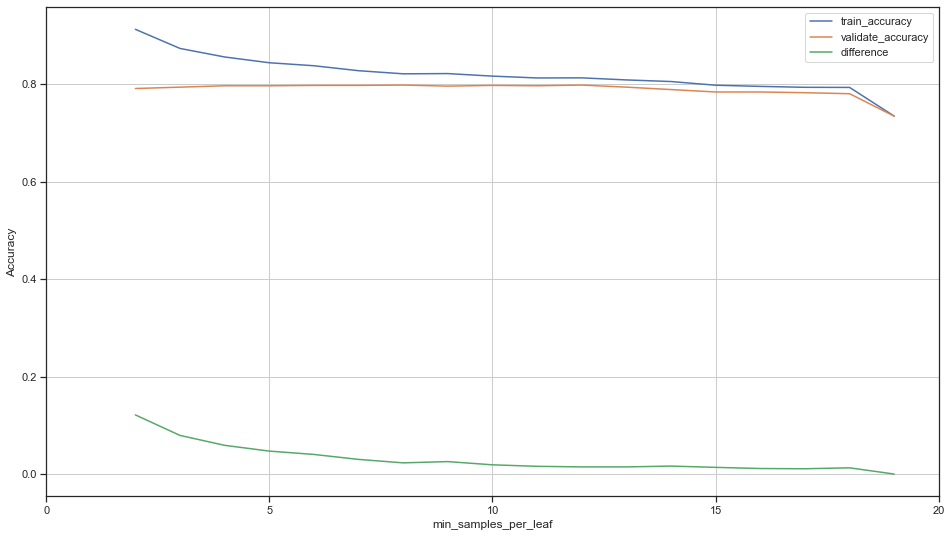

In [90]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,25,5))
plt.grid()

## KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier


In [92]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train_telco, y_train_telco)

    #predict it
    y_pred = knn.predict(X_train_telco)
    
    #score it
    acc = knn.score(X_train_telco, y_train_telco)
    acc_val = knn.score(X_validate_telco, y_validate_telco)
    
    models_acc.append([x, acc, acc_val])

In [93]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy',
                                  'validate_accuracy'])
df_models

,neighbors,train_accuracy,validate_accuracy
0,1,0.996213,0.719659
1,2,0.866746,0.770050
2,3,0.853964,0.765791
3,4,0.835030,0.773598
4,5,0.838580,0.769340
5,6,0.826036,0.778566
6,7,0.825562,0.782115
7,8,0.812781,0.787083
8,9,0.815858,0.785664
9,10,0.808521,0.779986


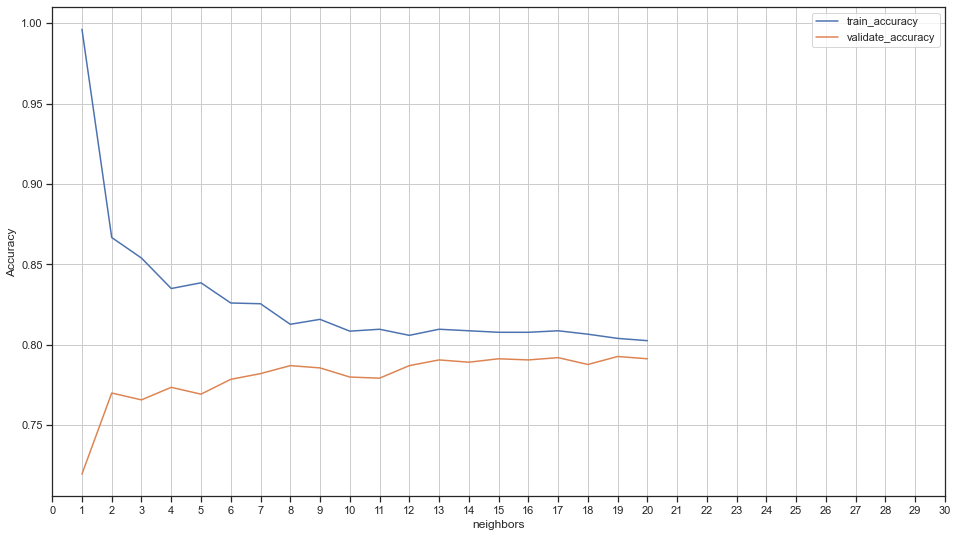

In [94]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [95]:
model3 = KNeighborsClassifier(n_neighbors=15)
model3.fit(X_train_telco, y_train_telco)
y_pred = model3.predict(X_train_telco)
y_pred_proba = model3.predict_proba(X_train_telco)
print('Accuracy of KNN classifier on training set: {:.2f}'.format(model3.score(X_train_telco, y_train_telco)))
print('Accuracy of KNN classifier on validate set: {:.2f}'.format(model3.score(X_validate_telco, y_validate_telco)))
cm = confusion_matrix(y_train_telco, y_pred)


Accuracy of KNN classifier on training set: 0.81
Accuracy of KNN classifier on validate set: 0.79


## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=.01, random_state=123, intercept_scaling=1, solver='lbfgs')
logit.fit(X_train_telco, y_train_telco)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)
y_pred = logit.predict(X_train_telco)
y_pred_proba = logit.predict_proba(X_train_telco)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X_train_telco, y_train_telco)))
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'.format(logit.score(X_train_telco, y_train_telco)))
cm = confusion_matrix(y_train_telco, y_pred)


Coefficient: 
 [[-0.11345937 -0.17979434  0.34180406 -0.36096485 -0.20804339  0.00433384
   0.02209362  0.32362393 -0.04933652 -0.15184119 -0.02703283  0.26531542]]
Intercept: 
 [-1.44200956]
Accuracy of Logistic Regression classifier on training set: 0.80
Accuracy of Logistic Regression classifier on validate set: 0.80


- #1 rf 81, 80
- #2 lr 80, 80
- #3 knn 81, 79
- #4 dt 80, 79

In [97]:
def model_scores(cm):
    '''
    Function to get all model scores necessary for codeup exercises
    Accepts a confusion matrix, and prints a report with the following:
        Accuracy
        True positive rate
        False positive rate
        True negative rate
        False negative rate 
        Precision
        Recall
        f1-score
        positive support
        negative support
    '''
    
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]
    ALL = TP + FP + FN + TN
    
    print('Model stats:')
   
    # accuracy
    acc = (TP + TN) / ALL
    print('Accuracy: {:.2f}'.format(acc))
    # true positive rate, also recall
    TPR = recall = TP/ (TP + FN)
    print('True Positive Rate: {:.2f}'.format(TPR))
    # false positive rate
    FPR = FP / (FP + TN)
    print('False Positive Rate: {:.2f}'.format(FPR))
    # true negative rate
    TNR = TN / (TN + FP)
    print('True Negative Rate: {:.2f}'.format(TNR))
    # false negative rate
    FNR = FN / (FN + TP)
    print('Flase Negative Rate: {:.2f}'.format(FNR))
    # precision
    precision = TP / (TP + FP)
    print('Precision: {:.2f}'.format(precision))
    # recall
    print('Recall: {:.2f}'.format(recall))
    # f1
    f1_score = 2 * (precision*recall) / (precision+recall)
    print('f1 score: {:.2f}'.format(f1_score))
    # support
    support_pos = TP + FN
    print('Positive support:',support_pos)
    support_neg = FP + TN
    print('Negative support:',support_neg)
    print('-----------------------------------------')

In [108]:
def rf_scores():
    model2 = RandomForestClassifier(min_samples_leaf=12, max_depth=8, random_state=123)
    model2.fit(X_train_telco, y_train_telco)
    y_pred = model2.predict(X_train_telco)
    y_pred_proba = model2.predict_proba(X_train_telco)
    cm = confusion_matrix(y_train_telco, y_pred)
    print('RandomForestClassifier min_samples_leaf=12, max_depth=8, random_state=123')
    model_scores(cm)
    print('Accuracy of random forest classifier on training set: {:.2f}'.format(model2.score(X_train_telco, y_train_telco)))
    print('Accuracy of random forest classifier on validate set: {:.2f}'.format(model2.score(X_validate_telco, y_validate_telco)))
    

In [109]:
rf_scores()

RandomForestClassifier min_samples_leaf=12, max_depth=8, random_state=123
Model stats:
Accuracy: 0.81
True Positive Rate: 0.51
False Positive Rate: 0.08
True Negative Rate: 0.92
Flase Negative Rate: 0.49
Precision: 0.71
Recall: 0.51
f1 score: 0.59
Positive support: 1121
Negative support: 3104
-----------------------------------------
Accuracy of random forest classifier on training set: 0.81
Accuracy of random forest classifier on validate set: 0.80


In [110]:
def knn_scores():
    print('KNeighborsClassifier n_neighbors=15')
    model3 = KNeighborsClassifier(n_neighbors=15)
    model3.fit(X_train_telco, y_train_telco)
    y_pred = model3.predict(X_train_telco)
    y_pred_proba = model3.predict_proba(X_train_telco)
    cm = confusion_matrix(y_train_telco, y_pred)
    model_scores(cm)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(model3.score(X_train_telco, y_train_telco)))
    print('Accuracy of KNN classifier on validate set: {:.2f}'.format(model3.score(X_validate_telco, y_validate_telco)))

In [111]:
knn_scores()

KNeighborsClassifier n_neighbors=15
Model stats:
Accuracy: 0.81
True Positive Rate: 0.51
False Positive Rate: 0.08
True Negative Rate: 0.92
Flase Negative Rate: 0.49
Precision: 0.69
Recall: 0.51
f1 score: 0.58
Positive support: 1121
Negative support: 3104
-----------------------------------------
Accuracy of KNN classifier on training set: 0.81
Accuracy of KNN classifier on validate set: 0.79


In [112]:
def lr_scores():
    print('LogisticRegression C=.01, random_state=123, intercept_scaling=1, solver=lbfgs')
    logit = LogisticRegression(C=.01, random_state=123, intercept_scaling=1, solver='lbfgs')
    logit.fit(X_train_telco, y_train_telco)
    y_pred = logit.predict(X_train_telco)
    y_pred_proba = logit.predict_proba(X_train_telco)
    cm = confusion_matrix(y_train_telco, y_pred)
    model_scores(cm)
    print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X_train_telco, y_train_telco)))
    print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'.format(logit.score(X_train_telco, y_train_telco)))

In [113]:
lr_scores()

LogisticRegression C=.01, random_state=123, intercept_scaling=1, solver=lbfgs
Model stats:
Accuracy: 0.80
True Positive Rate: 0.46
False Positive Rate: 0.09
True Negative Rate: 0.91
Flase Negative Rate: 0.54
Precision: 0.66
Recall: 0.46
f1 score: 0.55
Positive support: 1121
Negative support: 3104
-----------------------------------------
Accuracy of Logistic Regression classifier on training set: 0.80
Accuracy of Logistic Regression classifier on validate set: 0.80
